In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Getting Data and Understanding 

In [2]:
df=pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()   #Every columns datatype is in correct form.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.isnull().sum()  #data doesnt have any missing values.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Exploratory Data Analysis (EDA)

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df['receiver_is_merchant']=df['nameDest'].str.startswith('M').astype(int)

In [10]:
df['sender_frequency']=df['nameOrig'].map(df['nameOrig'].value_counts())
df['Receiver_frequency']=df['nameDest'].map(df['nameDest'].value_counts())
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,receiver_is_merchant,sender_frequency,Receiver_frequency
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,1,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,1,44
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,41
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,1,1


In [11]:
# deleting the nameOrig and nameDest columns.
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [12]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,receiver_is_merchant,sender_frequency,Receiver_frequency
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,1,1
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,1,1
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,1,44
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,41
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,1,1


In [14]:
df['error_balance_Orig']=df['oldbalanceOrg']-df['newbalanceOrig']-df['amount']
df['error_balance_Dest']=df['newbalanceDest']-df['oldbalanceDest']-df['amount']

In [15]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,receiver_is_merchant,sender_frequency,Receiver_frequency,error_balance_Orig,error_balance_Dest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,1,1,1.455192e-11,-9839.64
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,1,1,-1.136868e-12,-1864.28
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,1,44,0.000000e+00,-181.00
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,41,0.000000e+00,-21363.00
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,1,1,0.000000e+00,-11668.14


In [17]:
dummies=pd.get_dummies(df['type'],prefix='type').astype(int)
df=pd.concat([df,dummies],axis=1)

In [18]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,receiver_is_merchant,sender_frequency,Receiver_frequency,error_balance_Orig,error_balance_Dest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,1,1,1.455192e-11,-9839.64,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,1,1,-1.136868e-12,-1864.28,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,1,44,0.000000e+00,-181.00,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,41,0.000000e+00,-21363.00,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,1,1,0.000000e+00,-11668.14,0,0,0,1,0


In [19]:
# deleting the type columns. as we dont need it anymore.
df.drop('type',axis=1,inplace=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,receiver_is_merchant,sender_frequency,Receiver_frequency,error_balance_Orig,error_balance_Dest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,1,1,1.455192e-11,-9839.64,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,1,1,-1.136868e-12,-1864.28,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,1,44,0.000000e+00,-181.00,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,41,0.000000e+00,-21363.00,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,1,1,0.000000e+00,-11668.14,0,0,0,1,0


In [20]:
# In step column we have hours.
# so we cant use step directly. so, creating features like HOUR,DAY,IS_NIGHT.
# can help to identify fraud patterns in hours wise or daywise or in night or day.
df['hour'] = df['step']%24
df['day'] = df['step']//24
df['is_night'] = df['hour'].apply(lambda x: 1 if x < 6 else 0)


In [21]:
df.drop('step',axis=1,inplace=True)
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,receiver_is_merchant,sender_frequency,Receiver_frequency,error_balance_Orig,error_balance_Dest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,hour,day,is_night
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,1,1,1.455192e-11,-9839.64,0,0,0,1,0,1,0,1
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,1,1,-1.136868e-12,-1864.28,0,0,0,1,0,1,0,1
2,181.00,181.0,0.00,0.0,0.0,1,0,0,1,44,0.000000e+00,-181.00,0,0,0,0,1,1,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,41,0.000000e+00,-21363.00,0,1,0,0,0,1,0,1
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,1,1,0.000000e+00,-11668.14,0,0,0,1,0,1,0,1


#### Creating Outlier column as model is robust to outliers. and in this data outliers are important.

In [25]:
q1=df['amount'].quantile(0.25)
q3=df['amount'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
df['is_outlier_amount']=((df['amount']<lower_bound) | (df['amount']>upper_bound)).astype(int)

#### visualization [ exploring data and gaining insights].

Text(0.5, 1.0, 'Fraud vs Non_fraud')

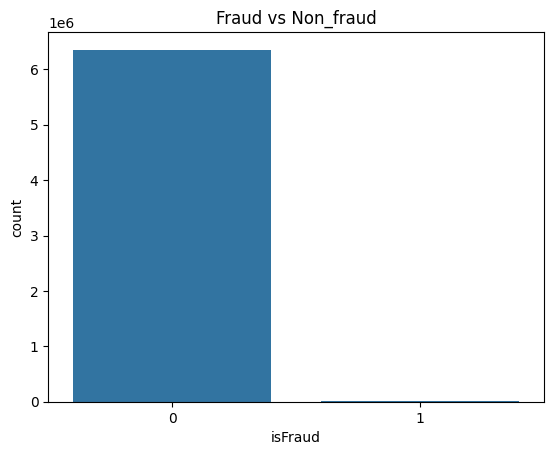

In [99]:
# checking class imbalance.
sns.countplot(x='isFraud',data=df)
plt.title('Fraud vs Non_fraud')

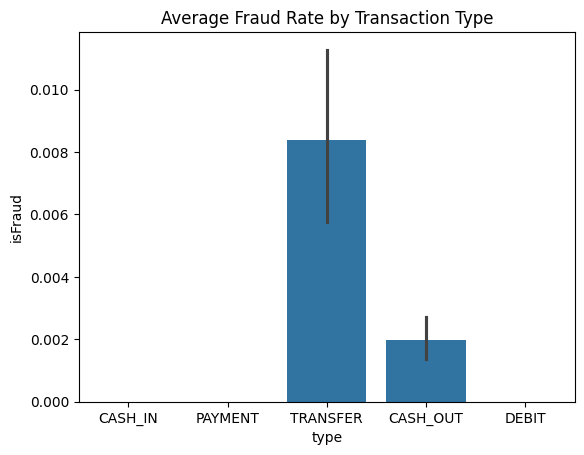

In [32]:
# checking type vs fraud.
# as i deleted the type column, i am using through by using fresh_data.
new_df=pd.read_csv('Fraud.csv')
sample_df = new_df.sample(50000, random_state=42)

sns.barplot(x='type', y='isFraud', data=sample_df)
plt.title("Average Fraud Rate by Transaction Type")
plt.show()

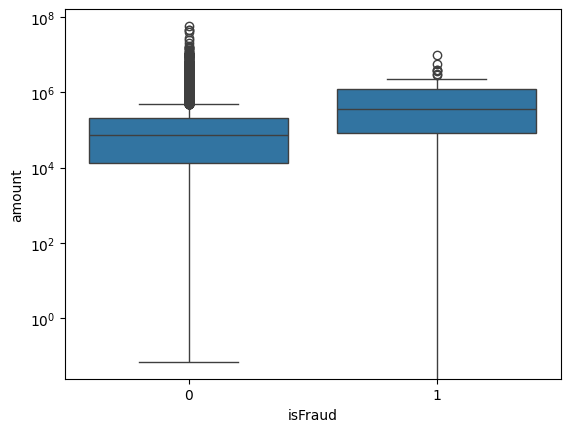

In [27]:
# amount vs fraud

sns.boxplot(x='isFraud',y='amount',data=df.sample(50000))
plt.yscale('log')
plt.show()

Text(0, 0.5, 'no.of Frauds')

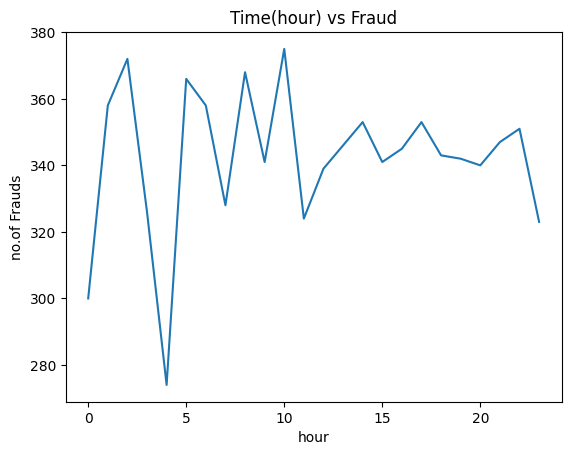

In [37]:
#Time vs Fraud.
fraud_by_hour=df[df['isFraud']==1].groupby('hour').size()
fraud_by_hour.plot(kind='line')
plt.title('Time(hour) vs Fraud')
plt.ylabel('no.of Frauds')


In [38]:
df.head(1)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,receiver_is_merchant,sender_frequency,Receiver_frequency,...,error_balance_Dest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,hour,day,is_night,is_outlier_amount
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,1,1,...,-9839.64,0,0,0,1,0,1,0,1,0


C:\Users\Ravindhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


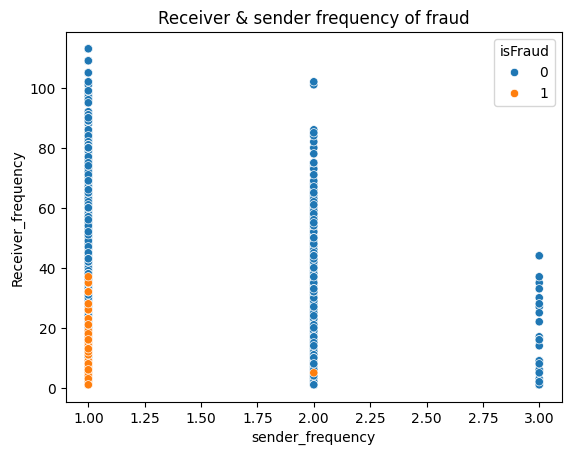

In [40]:
# Sender & Receiver Frequency of fraud.

sns.scatterplot(x='sender_frequency',y='Receiver_frequency',hue='isFraud',data=df)
plt.title('Receiver & sender frequency of fraud')
plt.show()

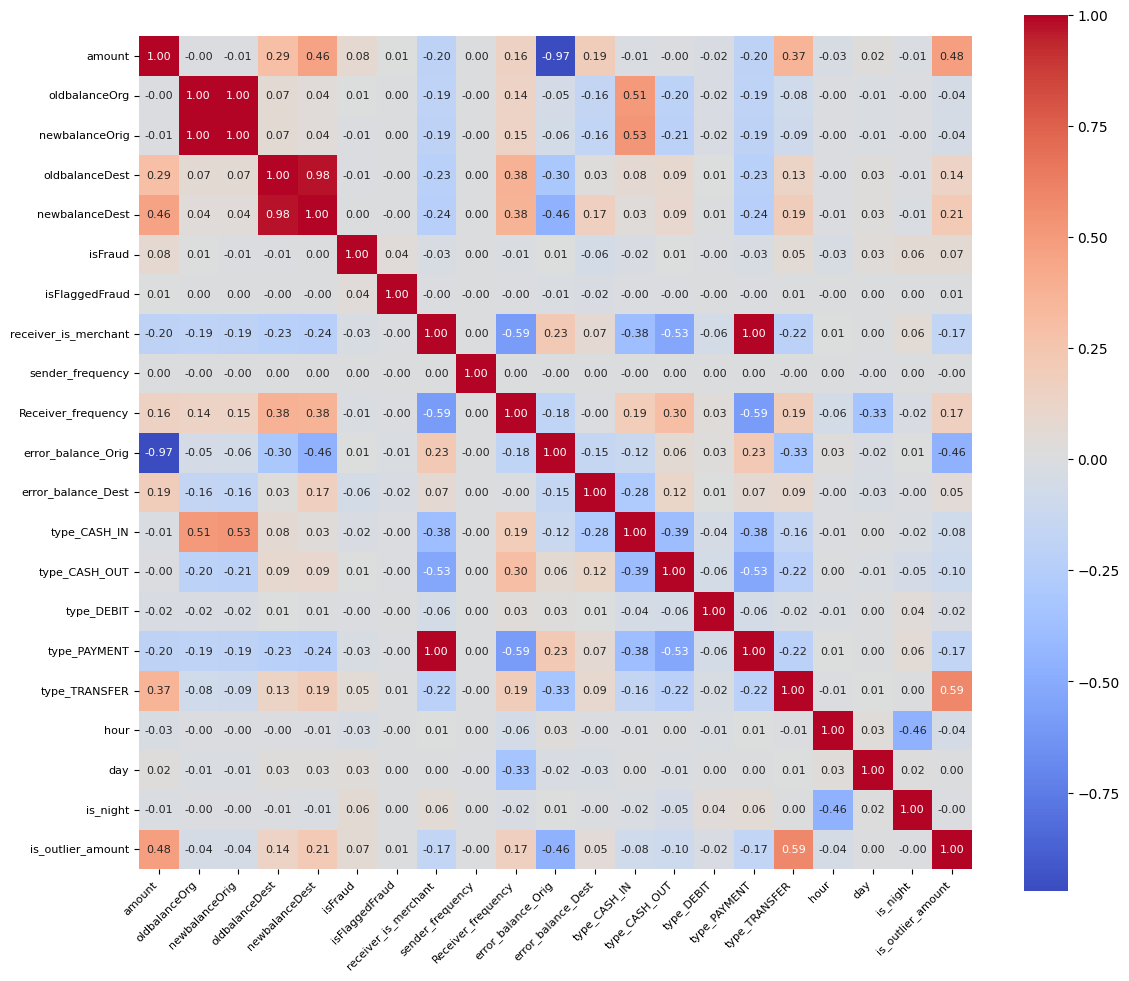

In [42]:
# Identifying the correlation blw the features.

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm',square=True,annot_kws={'size':8})
plt.xticks(rotation=45,ha='right',fontsize=8)
plt.yticks(rotation=0,fontsize=8)
plt.tight_layout()
plt.show()

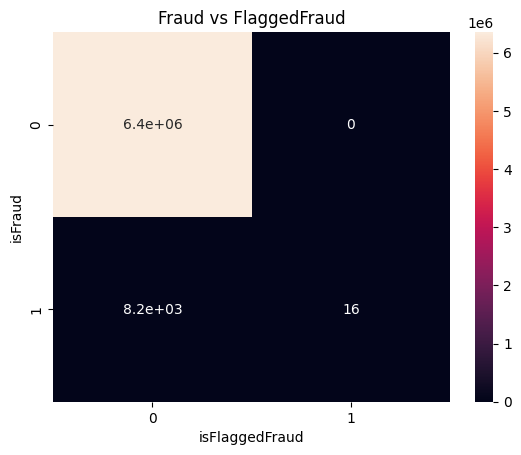

In [45]:
# Fraud vs flaggedFrauds.

sns.heatmap(pd.crosstab(df.isFraud,df.isFlaggedFraud),annot=True)
plt.title('Fraud vs FlaggedFraud')
plt.show()

In [ ]:
observation : 1. The system or software using for fraud detection is done worst performance.
                 they should redefine that with machine learning model for rich predictions.

#### Splitting Data

In [47]:
y=df['isFraud']
X=df.drop(['isFraud','isFlaggedFraud'],axis=1)


In [50]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,receiver_is_merchant,sender_frequency,Receiver_frequency,error_balance_Orig,error_balance_Dest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,hour,day,is_night,is_outlier_amount
0,9839.64,170136.00,160296.36,0.00,0.00,1,1,1,1.455192e-11,-9.839640e+03,0,0,0,1,0,1,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,1,1,1,-1.136868e-12,-1.864280e+03,0,0,0,1,0,1,0,1,0
2,181.00,181.00,0.00,0.00,0.00,0,1,44,0.000000e+00,-1.810000e+02,0,0,0,0,1,1,0,1,0
3,181.00,181.00,0.00,21182.00,0.00,0,1,41,0.000000e+00,-2.136300e+04,0,1,0,0,0,1,0,1,0
4,11668.14,41554.00,29885.86,0.00,0.00,1,1,1,0.000000e+00,-1.166814e+04,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,0,1,2,0.000000e+00,0.000000e+00,0,1,0,0,0,23,30,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,0,1,1,0.000000e+00,-6.311409e+06,0,0,0,0,1,23,30,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,3,0.000000e+00,-1.000000e-02,0,1,0,0,0,23,30,0,1
6362618,850002.52,850002.52,0.00,0.00,0.00,0,1,1,0.000000e+00,-8.500025e+05,0,0,0,0,1,23,30,0,1


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


### Initial Training (XGBoost Algorithm)............Feature importance and selection

In [54]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

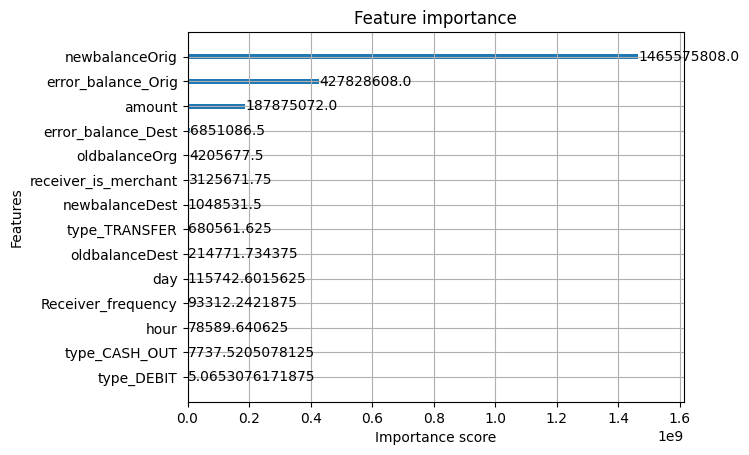

In [55]:
from xgboost import plot_importance
plot_importance(xgb,max_num_features=20,importance_type='gain')
plt.show()

In [56]:
X.drop('type_DEBIT',axis=1,inplace=True)

In [57]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
y_pred=xgb.predict(X_test)


In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

In [59]:

classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   1270907\n           1       0.70      0.74      0.72      1617\n\n    accuracy                           1.00   1272524\n   macro avg       0.85      0.87      0.86   1272524\nweighted avg       1.00      1.00      1.00   1272524\n'

### Fine Tuning Model

In [75]:
scale=len(y_train[y_train==0])/len(y_train[y_train==1])
model=XGBClassifier(scale_pos_weight=scale,eval_metric='logloss')
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [61]:
y_predict=model.predict(X_test)

In [62]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   1270907\n           1       0.89      0.99      0.94      1617\n\n    accuracy                           1.00   1272524\n   macro avg       0.94      1.00      0.97   1272524\nweighted avg       1.00      1.00      1.00   1272524\n'

In [72]:
y_probs=model.predict_proba(X_test)[:,1]
threshold=0.65
y_prob_pred=(y_probs>threshold).astype(int)


In [73]:
print("Accuracy      :", accuracy_score(y_test,y_prob_pred))
print("Precision     :", precision_score(y_test,y_prob_pred))
print("Recall        :", recall_score(y_test, y_prob_pred))
print("F1 Score      :", f1_score(y_test,y_prob_pred))

# Optional: Confusion Matrix
cm = confusion_matrix(y_test,y_prob_pred)
print("Confusion Matrix:\n", cm)

Accuracy      : 0.9998420462010933
Precision     : 0.8990980834272829
Recall        : 0.9863945578231292
F1 Score      : 0.9407254497198466
Confusion Matrix:
 [[1270728     179]
 [     22    1595]]


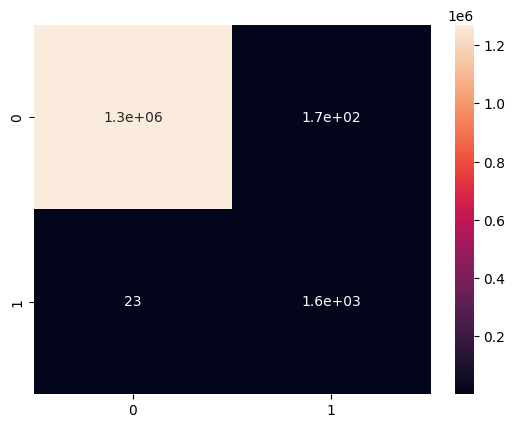

In [69]:
sns.heatmap(cm,annot=True)
plt.show()

### Cross Validation (k=5)

In [76]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
f1_scores=cross_val_score(model,X_train,y_train,cv=skf,scoring='f1')
print("fl scores on each fold\n",f1_scores)
print("average f1 score",f1_scores.mean())

fl scores on each fold
 [0.94664247 0.94211288 0.93539124 0.93853941 0.93788151]
average f1 score 0.940113501042547


#### This is More Generalized model
#### Having Good metrics scores : 
                                  Accuracy      : 0.9998420462010933
                                  Precision     : 0.8990980834272829
                                  Recall        : 0.9863945578231292
                                  F1 Score      : 0.9407254497198466



#### Saving model

In [79]:
import joblib
joblib.dump(model,'Fraud_Detection_model.pkl')

['Fraud_Detection_model.pkl']

## Question Asked : 

In [ ]:
# To ensure readability i am answering this question after completing the task.